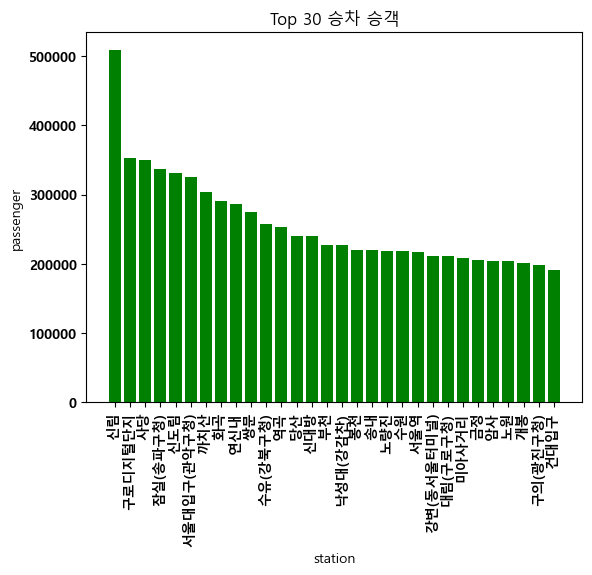

신림 508974
구로디지털단지 353090
사당 350305
잠실(송파구청) 336531
신도림 331352
서울대입구(관악구청) 325986
까치산 303667
화곡 290069
연신내 286530
쌍문 275060
수유(강북구청) 257024
역곡 252915
당산 240502
신대방 240488
부천 227528
낙성대(강감찬) 227024
봉천 219754
송내 219562
노량진 218659
수원 218382
서울역 217586
강변(동서울터미널) 211824
대림(구로구청) 210535
미아사거리 207840
금정 206174
암사 203835
노원 203820
개봉 201630
구의(광진구청) 198323
건대입구 191657


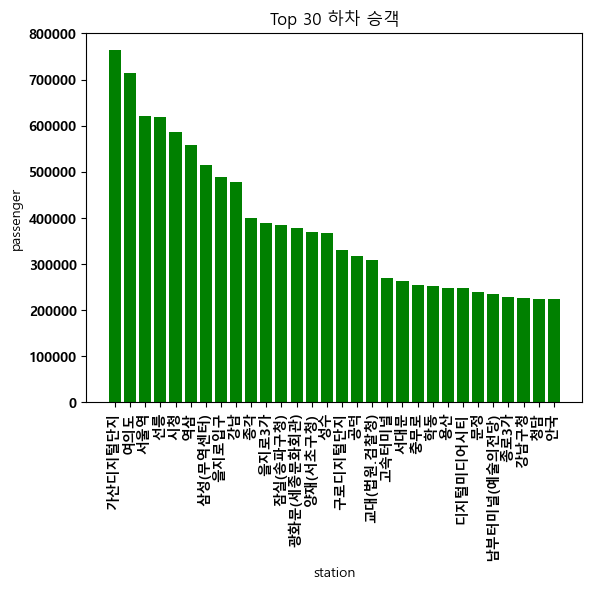

가산디지털단지 763540
여의도 714607
서울역 619783
선릉 617637
시청 586520
역삼 557177
삼성(무역센터) 514156
을지로입구 489151
강남 478311
종각 400138
을지로3가 389692
잠실(송파구청) 385438
광화문(세종문화회관) 377186
양재(서초구청) 368566
성수 366269
구로디지털단지 330651
공덕 316118
교대(법원.검찰청) 308138
고속터미널 270144
서대문 261909
충무로 255156
학동 252397
용산 247496
디지털미디어시티 247015
문정 239645
남부터미널(예술의전당) 233699
종로3가 228352
강남구청 226991
청담 224529
안국 224019


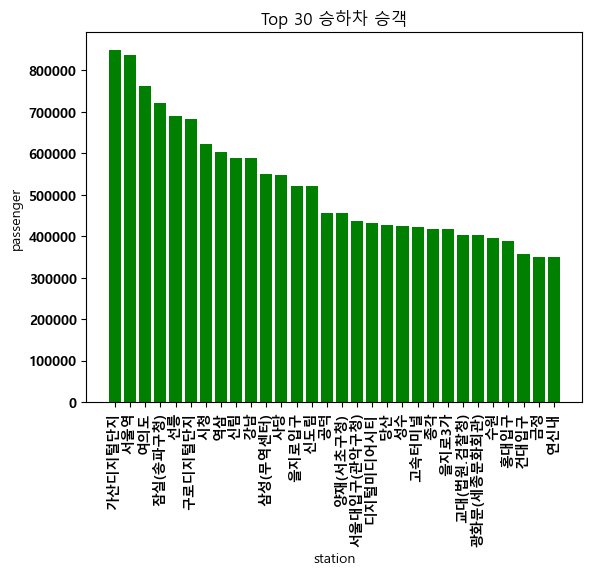

가산디지털단지 849144
서울역 837369
여의도 761431
잠실(송파구청) 721969
선릉 690400
구로디지털단지 683741
시청 621445
역삼 602279
신림 589175
강남 589003
삼성(무역센터) 550619
사당 546898
을지로입구 520825
신도림 520459
공덕 456479
양재(서초구청) 455565
서울대입구(관악구청) 436047
디지털미디어시티 432467
당산 427555
성수 424934
고속터미널 421424
종각 417949
을지로3가 417370
교대(법원.검찰청) 403556
광화문(세종문화회관) 401904
수원 395410
홍대입구 389011
건대입구 357824
금정 350294
연신내 349373


In [41]:
import csv
import matplotlib.pyplot as plt

def do(file, key):
    f = open(file)
    data = csv.reader(f)
    next(data)
    next(data)
    
    stations = {}
    
    for row in data:
        if(stations.get(row[3])==None):
            if key == '승차':
                stations[row[3]] = int(row[4])+int(row[6])
            elif key == '하차' :
                stations[row[3]] = int(row[5])+int(row[7])
            else:
                stations[row[3]]= int(row[4])+int(row[5])+int(row[6])+int(row[7])
        else:
            origin = stations.get(row[3])
            if key == '승차':
                stations[row[3]] = origin + int(row[4])+int(row[6])
            elif key == '하차' :
                stations[row[3]] = origin + int(row[5])+int(row[7])
            else:
                stations[row[3]]= origin + int(row[4])+int(row[5])+int(row[6])+int(row[7])
        
    passengers = list(stations.values())
    passengers.sort(reverse=True)
    
    temp_stations = {v:k for k,v in stations.items()}
    
    top30_stations=[]
    top30_passengers=[]
    for i in range(30) :
        top30_stations.append(temp_stations.get(passengers[i]))
        top30_passengers.append(passengers[i])

    # 폰트 설정
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['font.size'] = 10
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['axes.unicode_minus'] = False
    
    if key=='승차':
        plt.title('Top 30 승차 승객')
    elif key=='하차':
        plt.title('Top 30 하차 승객')
    else:
        plt.title('Top 30 승하차 승객')
    
    plt.xlabel('station')
    plt.ylabel('passenger')
    
    bar = plt.bar(top30_stations, top30_passengers, color='g')
    plt.tick_params(axis='x', rotation=90)
   
    plt.show()
    
    for i in range(30):
        print(top30_stations[i],top30_passengers[i])

    f.close()
    
if __name__ == '__main__':
    do('q4.csv', '승차')
    do('q4.csv', '하차')
    do('q4.csv', '승하차')
